### Census M3 Report from API

Brian Dew, @bd_econ, March 23, 2018

In [1]:
import requests
import pandas as pd

import config
key = config.census_key

In [78]:
base = 'https://api.census.gov/data/timeseries/eits/m3'
param = 'cell_value,time_slot_id'
time = '&time=from+2015'
cat = '&category_code=NXA'
dtc = '&data_type_code=MPCNO'
oth = '&for=us&seasonally_adj=yes'

url = f'{base}?get={param}&key={key}{cat}{dtc}{time}{oth}'

In [79]:
r = requests.get(url).json()

In [119]:
df = pd.DataFrame({'date': [pd.to_datetime(i[4]) for i in r[1:]], 
                   'value': [float(i[0]) for i in r[1:]]}).sort_values('date')

### Manually pull values from advanced report: https://www.census.gov/manufacturing/m3/adv/pdf/durgd.pdf

In [120]:
df = df.set_index('date')
df.at[pd.to_datetime('2018-01-01')] = -0.4
df.at[pd.to_datetime('2018-02-01')] = 1.8

In [116]:
%matplotlib inline

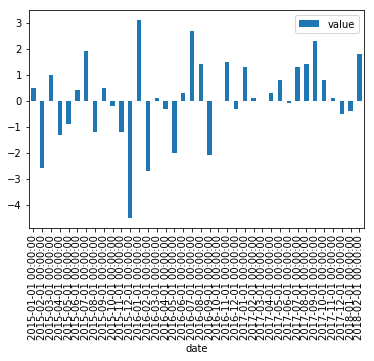

In [121]:
df.plot(kind='bar')

In [113]:
df.at['2018-01-01'] = -0.4

In [115]:
df.at['2018-02-01'] = 1.8

In [91]:
dict(zip(r[0], r[1:]))

{'category_code': ['0.1', '806', 'NXA', 'MPCNO', '2017-02', 'yes', '1'],
 'cell_value': ['0.5', '789', 'NXA', 'MPCNO', '2015-09', 'yes', '1'],
 'data_type_code': ['-2.6', '782', 'NXA', 'MPCNO', '2015-02', 'yes', '1'],
 'seasonally_adj': ['-1.3', '784', 'NXA', 'MPCNO', '2015-04', 'yes', '1'],
 'time': ['1.0', '783', 'NXA', 'MPCNO', '2015-03', 'yes', '1'],
 'time_slot_id': ['0.5', '781', 'NXA', 'MPCNO', '2015-01', 'yes', '1'],
 'us': ['-0.9', '785', 'NXA', 'MPCNO', '2015-05', 'yes', '1']}

In [90]:
pd.DataFrame(r[1:], columns=r[0]).sort_values('time_slot_id')

,cell_value,time_slot_id,category_code,data_type_code,time,seasonally_adj,us
1,0.5,781,NXA,MPCNO,2015-01,yes,1
3,-2.6,782,NXA,MPCNO,2015-02,yes,1
4,1.0,783,NXA,MPCNO,2015-03,yes,1
5,-1.3,784,NXA,MPCNO,2015-04,yes,1
6,-0.9,785,NXA,MPCNO,2015-05,yes,1
7,0.4,786,NXA,MPCNO,2015-06,yes,1
8,1.9,787,NXA,MPCNO,2015-07,yes,1
9,-1.2,788,NXA,MPCNO,2015-08,yes,1
0,0.5,789,NXA,MPCNO,2015-09,yes,1
10,-0.2,790,NXA,MPCNO,2015-10,yes,1


In [20]:
requests.get(url).text()

TypeError: 'str' object is not callable

In [16]:
print(url)

https://api.census.gov/data/timeseries/eits/m3/enduse?get=cell_value,seasonally_adjusted


In [74]:
r = requests.get(url)

In [75]:
r.text

'error: error: missing required variable/predicate: time_slot_id'

In [71]:
pd.DataFrame(r.json())

,0,1,2,3,4,5,6
0,cell_value,time_slot_id,category_code,data_type_code,time,seasonally_adj,us
1,0.5,789,NXA,MPCNO,2015-09,yes,1
2,-3.4,721,NXA,MPCNO,2010-01,yes,1
3,2.1,741,NXA,MPCNO,2011-09,yes,1
4,-1.9,745,NXA,MPCNO,2012-01,yes,1
5,0.6,749,NXA,MPCNO,2012-05,yes,1
6,-1.2,773,NXA,MPCNO,2014-05,yes,1
7,0.5,781,NXA,MPCNO,2015-01,yes,1
8,0.1,806,NXA,MPCNO,2017-02,yes,1
9,1.4,722,NXA,MPCNO,2010-02,yes,1
